### System Check ~ GPU Availability

In [1]:
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
import time
import keras
import numpy as np
import os
import platform

# plot configurations
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Avenir'

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.0-arm64-arm-64bit
Tensor Flow Version: 2.13.0
Keras Version: 2.13.1

Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
Pandas 2.1.1
Scikit-Learn 1.3.1
GPU is available


### Tensorflow Imports

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

### Sklear Imports

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Reading Data

In [4]:
data = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")
data.head(3)

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Data Type Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Columns: 301 entries, LABEL to young
dtypes: int64(300), object(1)
memory usage: 3.4+ MB


In [6]:
# all the different categories in the data
data.LABEL.value_counts()

LABEL
football    500
politics    497
science     496
Name: count, dtype: int64

### Train-Validation-Test-Splits

In [7]:
X = data.drop("LABEL",axis=1)
y = data['LABEL']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   shuffle=True,
                                                   random_state=303)

# Validation Set 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
                                                test_size=0.5,
                                                shuffle=True,
                                                random_state=303)

In [9]:
# Shapes
x_tr_per = (x_train.shape[0]/data.shape[0])*100
x_te_per = (x_test.shape[0]/data.shape[0])*100
x_val_per = (x_val.shape[0]/data.shape[0])*100

x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

print(f"Training Set Shape: {x_train.shape} ~ {np.round(x_tr_per)}%")
print(f"Validation Set Shape: {x_val.shape} ~ {np.round(x_val_per)}%")
print(f"Test Set Shape: {x_test.shape} ~ {np.round(x_te_per)}%")
print("--"*25)
print("Total Records: ", data.shape[0])


Training Set Shape: (1194, 300) ~ 80.0%
Validation Set Shape: (149, 300) ~ 10.0%
Test Set Shape: (150, 300) ~ 10.0%
--------------------------------------------------
Total Records:  1493


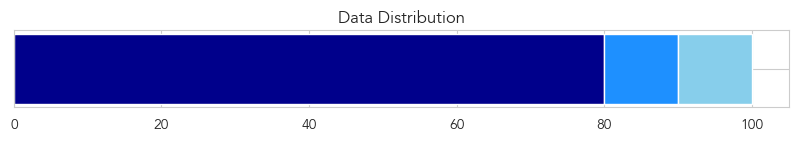

In [10]:
import matplotlib.pyplot as plt

# create data
plt.figure(figsize=(10, 1))
x = [""]
y1 = [80]
y2 = [10]
y3 = [10]

# plot bars in stack manner (horizontal)
plt.barh(x, y1, color='DarkBlue')
plt.barh(x, y2, left=y1, color='Dodgerblue')
plt.barh(x, y3, left=[y1[0] + y2[0]], color='skyblue') 
plt.title("Data Distribution")
plt.show()



The Dataset is split according to the general convention of having the same distribution size for the Validation/dev and Test Sets. And allocating as much as possible for the train set. 

The Train set and the validation and test sets are disjoint and come from separate distributions

### Encoding Label

In [11]:
mapper = {x: i for i, x in enumerate(data.LABEL.unique(),0)}
class_dictionary = {i: x for i, x in enumerate(data.LABEL.unique(),0)}
class_dictionary

{0: 'politics', 1: 'football', 2: 'science'}

In [12]:
y_encoded_train = y_train.map(mapper)
y_encoded_test = y_test.map(mapper)
y_encoded_val = y_val.map(mapper)
y_encoded_train

690     1
751     1
1120    2
224     0
433     0
       ..
676     1
1153    2
530     1
1404    2
571     1
Name: LABEL, Length: 1194, dtype: int64

In [13]:
y_encoded_train = to_categorical(y_encoded_train)
y_encoded_test = to_categorical(y_encoded_test)
y_encoded_val = to_categorical(y_encoded_val)
y_encoded_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

One-hot Encoding y label

## Artificial Neural Neural Networks ~ ANN

### Model Building

In [14]:
ann_model = Sequential() # Model Foundation 

ann_model.add(Dense(128, activation="relu"))
ann_model.add(Dense(64, activation="relu"))
ann_model.add(Dropout(0.5)) # 50% probability of dropout
ann_model.add(Dense(16, activation="relu"))
ann_model.add(Dropout(0.5)) # 50% probability of dropout
ann_model.add(Dense(3, activation="softmax")) # Output Layer 


ann_model._name = "ArtificialNeuralNet"
ann_model.build(x_train.shape)
ann_model.compile(optimizer="adam", loss="categorical_crossentropy",
                 metrics=['accuracy',"AUC"])

2023-12-10 00:20:03.510306: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-10 00:20:03.510331: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-10 00:20:03.510336: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-10 00:20:03.510368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 00:20:03.510386: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
ann_model.summary(show_trainable=True,expand_nested=True)

Model: "ArtificialNeuralNet"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 dense (Dense)               (1194, 128)               38528     Y          
                                                                            
 dense_1 (Dense)             (1194, 64)                8256      Y          
                                                                            
 dropout (Dropout)           (1194, 64)                0         Y          
                                                                            
 dense_2 (Dense)             (1194, 16)                1040      Y          
                                                                            
 dropout_1 (Dropout)         (1194, 16)                0         Y          
                                                                            
 dense_3 (Dense)             (1194, 3)         

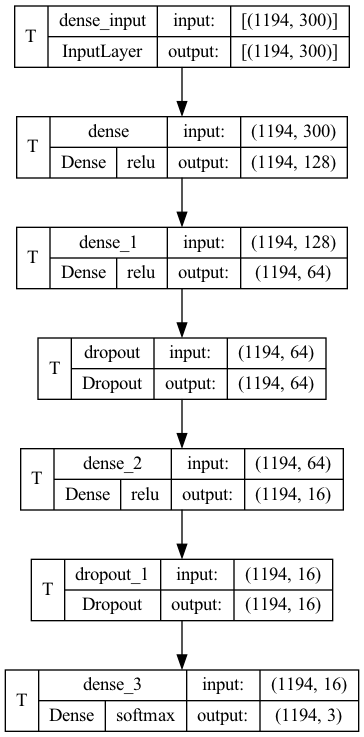

In [16]:
# Visualising the Model
plot_model(ann_model,show_shapes=True, show_trainable=True, 
           show_layer_activations=True, dpi=96)

### Call Backs

In [17]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                                    patience=5, 
                                    mode='max', 
                                    verbose=1, 
                                    restore_best_weights=True)

### Training

In [18]:
# maintaining elapsed times for training for each model 
record_times = {}

In [19]:

start = time.time()
history_ann = ann_model.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])


elapsed = time.time() - start
record_times[ann_model._name] = elapsed

Epoch 1/25


2023-12-10 00:20:04.871750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 1.0621 - accuracy: 0.4146 - auc: 0.6135

2023-12-10 00:20:12.325018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 10s 180ms/step - loss: 1.0621 - accuracy: 0.4146 - auc: 0.6135 - val_loss: 0.9231 - val_accuracy: 0.5436 - val_auc: 0.7687
Epoch 2/25
38/38 [==============================] - 2s 60ms/step - loss: 0.9371 - accuracy: 0.5343 - auc: 0.7287 - val_loss: 0.8303 - val_accuracy: 0.6510 - val_auc: 0.8443
Epoch 3/25
38/38 [==============================] - 2s 60ms/step - loss: 0.8262 - accuracy: 0.6307 - auc: 0.8160 - val_loss: 0.7385 - val_accuracy: 0.7181 - val_auc: 0.8806
Epoch 4/25
38/38 [==============================] - 2s 58ms/step - loss: 0.7416 - accuracy: 0.6692 - auc: 0.8538 - val_loss: 0.6606 - val_accuracy: 0.7450 - val_auc: 0.8948
Epoch 5/25
38/38 [==============================] - 2s 62ms/step - loss: 0.6545 - accuracy: 0.7186 - auc: 0.8868 - val_loss: 0.6164 - val_accuracy: 0.6913 - val_auc: 0.9002
Epoch 6/25
38/38 [==============================] - 2s 58ms/step - loss: 0.5852 - accuracy: 0.7554 - auc: 0.9120 - val_loss: 0.6058 - val_accura

## Performance Visualisation - ANN

### Accuracy, Loss and AUC over the Epochs

In [91]:
def plot_perf_over_epochs(history, model_name, epochs, metric="accuracy"):
    
    history = pd.DataFrame(history.history)
    
    metric = metric.lower()
    if metric == "auc":
        # Baseline value
        baseline = 0.5
        epochs = range(history.shape[0])

        auc_values = history['auc']
        val_auc_values = history['val_auc']

        # Plotting the AUC, validation AUC, and baseline
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, auc_values, 'bo-', label='Training AUC')
        plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')
        plt.axhline(y=baseline, color='g', linestyle='--', label='Baseline')
        plt.title(f'{model_name} - Training and Validation AUC with Baseline')
        plt.xlabel('Epochs')
        plt.ylabel('AUC')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    else:
        plt.figure(figsize=(10,5))
        sns.lineplot(x=range(history.shape[0]), y=f"{metric}", data=history, color="royalblue",
                     label=f"{metric.capitalize()}")
        plt.legend()

        # Visualize the accuracy history
        sns.lineplot(x=range(history.shape[0]), y=f"val_{metric}", data=history, color="orangered",
                     marker='o', 
                     label=f'Validation {metric.capitalize()}')
        if history.shape[0]<epochs:
            plt.axvline(x=history.shape[0]-5, color='red', linestyle='--', label='Early Stopping')
        
        plt.xlim(0, epochs)
        plt.title(f"{model_name} - {metric.capitalize()} History", size=15)
        plt.xlabel("Epochs")
        plt.ylabel(f"{metric.capitalize()}")
        plt.legend(loc='best')
        plt.show()
        
    

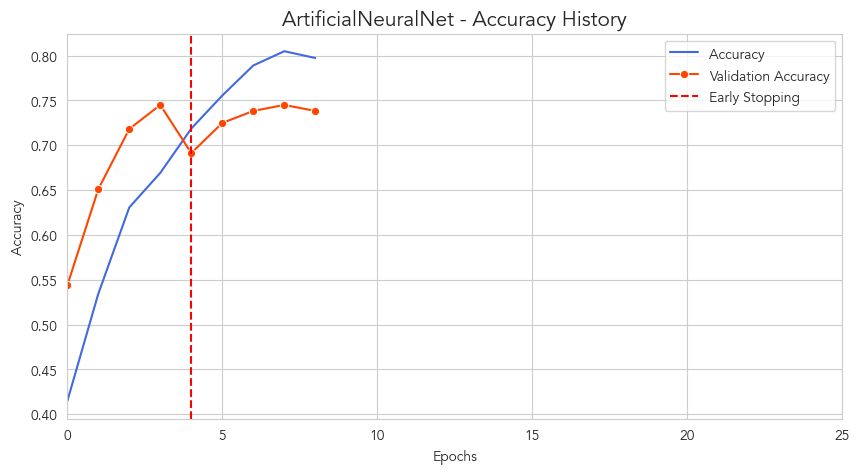

In [92]:
plot_perf_over_epochs(history_ann, ann_model._name, epochs=25, metric="accuracy")

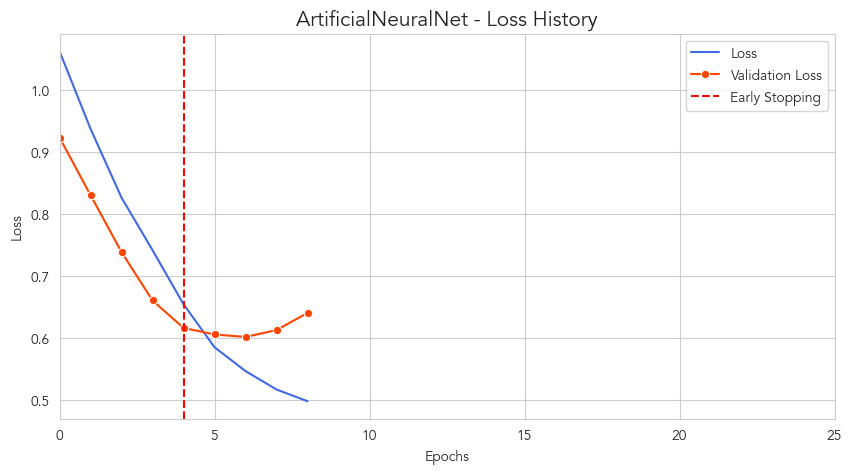

In [93]:
plot_perf_over_epochs(history_ann, ann_model._name, epochs=25, metric="loss")

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_8281/2768384562.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


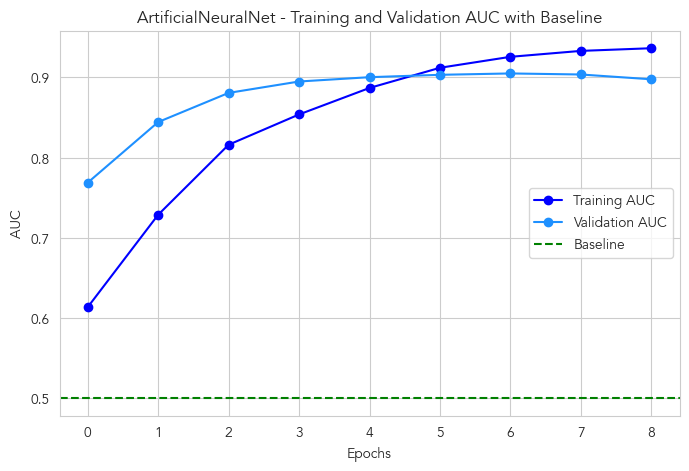

In [94]:
plot_perf_over_epochs(history_ann, ann_model._name, epochs=25, metric="auc")

### Confusion Matrix & Classification Report

In [43]:
ann_predictions = ann_model.predict(x_test)
ann_predictions

5/5 [==============================] - 0s 4ms/step


array([[0.05560737, 0.8298619 , 0.11453078],
       [0.22855344, 0.42502105, 0.34642547],
       [0.14270186, 0.12195344, 0.7353447 ],
       [0.05144772, 0.03947201, 0.90908027],
       [0.01710708, 0.94478583, 0.03810703],
       [0.33209598, 0.29445907, 0.37344497],
       [0.22492838, 0.45553714, 0.31953445],
       [0.14946102, 0.41785806, 0.4326809 ],
       [0.58581114, 0.15515442, 0.25903443],
       [0.11823754, 0.1026441 , 0.7791184 ],
       [0.18086469, 0.48284   , 0.3362953 ],
       [0.10720591, 0.12990877, 0.76288533],
       [0.33336267, 0.3124651 , 0.3541722 ],
       [0.3695165 , 0.20373647, 0.42674705],
       [0.294339  , 0.4197232 , 0.28593782],
       [0.18880324, 0.14997882, 0.661218  ],
       [0.4819942 , 0.18118209, 0.3368237 ],
       [0.5870634 , 0.12345265, 0.28948402],
       [0.25521946, 0.40710047, 0.33768004],
       [0.98533684, 0.0010497 , 0.01361336],
       [0.50516385, 0.10056894, 0.3942672 ],
       [0.3133839 , 0.34936643, 0.3372496 ],
       [0.

In [44]:
def translate_predictions(predictions, class_dictionary):
    return np.array([class_dictionary[pred] for pred in predictions.argmax(axis=1)])

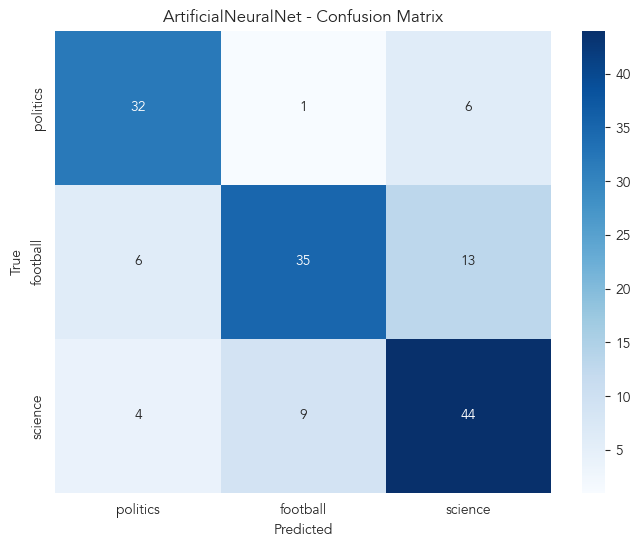

In [45]:
y_pred = translate_predictions(ann_predictions, class_dictionary)
cm_ann = confusion_matrix(y_test, y_pred)

def plot_cm(cm, model_name, class_dictionary):

    # Set labels for the confusion matrix
    labels = list(class_dictionary.values())

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_ann, annot=True, cmap='Blues', 
                fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    

plot_cm(cm_ann, ann_model._name, class_dictionary)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.76      0.82      0.79        39
    politics       0.78      0.65      0.71        54
     science       0.70      0.77      0.73        57

    accuracy                           0.74       150
   macro avg       0.75      0.75      0.74       150
weighted avg       0.74      0.74      0.74       150



In [47]:
print("Final ANN Accuracy on the Test Set: {:.2f}".format(ann_model.evaluate(x_test, y_encoded_test)[1]))

5/5 [==============================] - 0s 52ms/step - loss: 0.6726 - accuracy: 0.7400 - auc: 0.8969
Final ANN Accuracy on the Test Set: 0.74


## Convolutional Neural Network

In [48]:
x_train.shape

(1194, 300)

In [30]:
sequence_length = 300
num_features = 1 

convnet = Sequential()

convnet.add(Embedding(input_dim=sequence_length, output_dim=64, input_length=sequence_length))
convnet.add(MaxPooling1D(pool_size=2))

convnet.add(Conv1D(32, kernel_size=3, activation='relu'))
convnet.add(MaxPooling1D(pool_size=2))

convnet.add(Conv1D(16, kernel_size=3, activation='relu'))
convnet.add(MaxPooling1D(pool_size=2))

convnet.add(Conv1D(8, kernel_size=3, activation='relu'))
convnet.add(MaxPooling1D(pool_size=2))

convnet.add(Flatten())
convnet.add(Dropout(0.5))

convnet.add(Dense(3, activation='softmax'))

In [31]:
convnet._name = "ConvolutionalNeuralNet"
convnet.summary(show_trainable=True)

Model: "ConvolutionalNeuralNet"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 300, 64)           19200     Y          
                                                                            
 max_pooling1d (MaxPooling1  (None, 150, 64)           0         Y          
 D)                                                                         
                                                                            
 conv1d (Conv1D)             (None, 148, 32)           6176      Y          
                                                                            
 max_pooling1d_1 (MaxPoolin  (None, 74, 32)            0         Y          
 g1D)                                                                       
                                                                            
 conv1d_1 (Conv1D)           (None, 72, 16) 

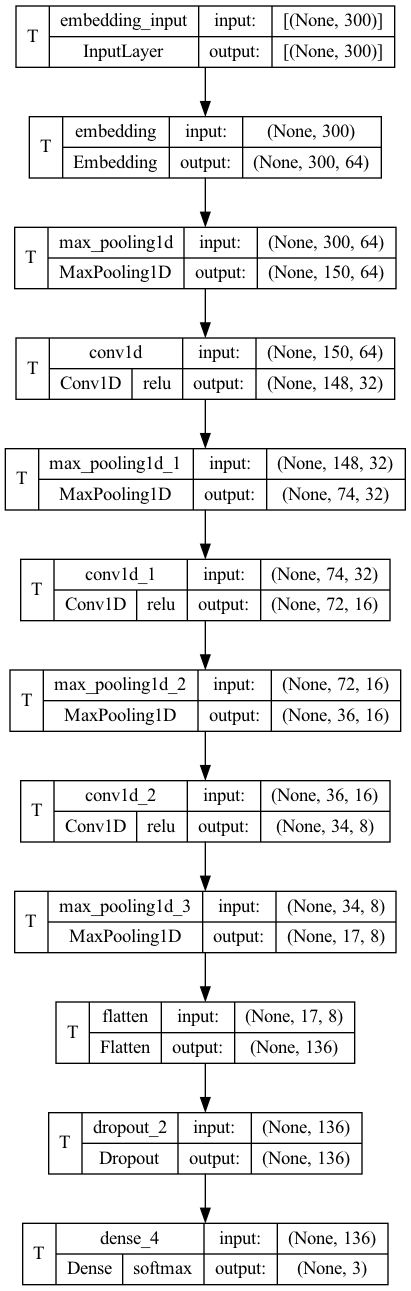

In [32]:
# Visualising the Model
plot_model(convnet,show_shapes=True, show_trainable=True, 
           show_layer_activations=True, dpi=96)

In [33]:
convnet.compile(optimizer="adam", loss="categorical_crossentropy",
                 metrics=['accuracy',"AUC"])

In [34]:

start = time.time()
history_cnn = convnet.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])


elapsed = time.time() - start
record_times[convnet._name] = elapsed

Epoch 1/25


2023-12-10 00:20:36.710027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.3400 - auc: 0.4957

2023-12-10 00:20:47.688453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 15s 272ms/step - loss: 1.0997 - accuracy: 0.3400 - auc: 0.4957 - val_loss: 1.0979 - val_accuracy: 0.3691 - val_auc: 0.5250
Epoch 2/25
38/38 [==============================] - 4s 102ms/step - loss: 1.0930 - accuracy: 0.3802 - auc: 0.5498 - val_loss: 1.0866 - val_accuracy: 0.3557 - val_auc: 0.5759
Epoch 3/25
38/38 [==============================] - 4s 95ms/step - loss: 1.0746 - accuracy: 0.3953 - auc: 0.5881 - val_loss: 1.0341 - val_accuracy: 0.3758 - val_auc: 0.6263
Epoch 4/25
38/38 [==============================] - 4s 95ms/step - loss: 1.0197 - accuracy: 0.4564 - auc: 0.6533 - val_loss: 0.9592 - val_accuracy: 0.5235 - val_auc: 0.7113
Epoch 5/25
38/38 [==============================] - 4s 93ms/step - loss: 0.9867 - accuracy: 0.4966 - auc: 0.6887 - val_loss: 0.9122 - val_accuracy: 0.5705 - val_auc: 0.7704
Epoch 6/25
38/38 [==============================] - 3s 92ms/step - loss: 0.9617 - accuracy: 0.5251 - auc: 0.7099 - val_loss: 0.8771 - val_accur

## Performance Visualisation - CNN

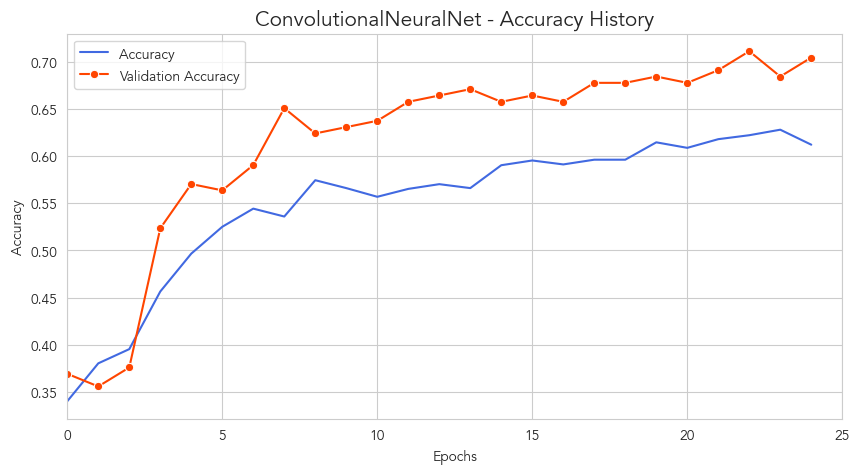

In [95]:
plot_perf_over_epochs(history_cnn, convnet._name,  epochs=25, metric="accuracy")

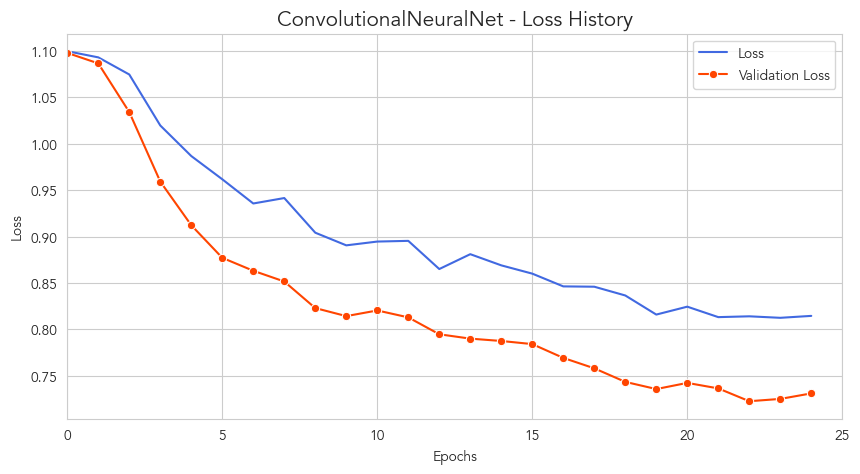

In [96]:
plot_perf_over_epochs(history_cnn, convnet._name, epochs=25, metric="loss")

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_8281/2768384562.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


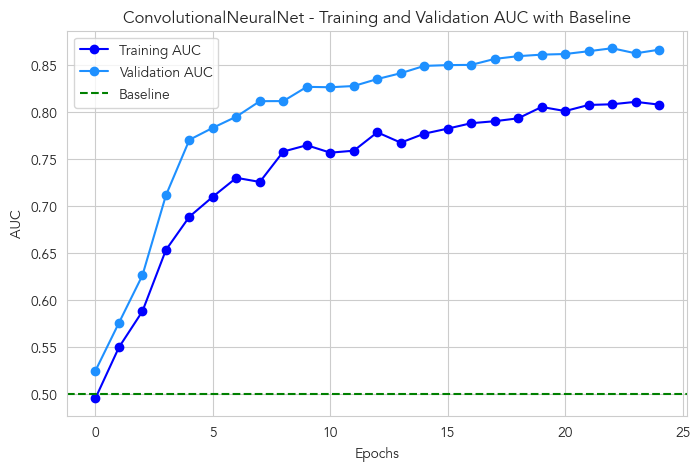

In [97]:
plot_perf_over_epochs(history_cnn, convnet._name, epochs=25, metric="auc")

### Confusion Matrix and Classification Report

In [53]:
cnn_predictions = convnet.predict(x_test)
cnn_predictions

2023-12-10 00:26:50.308782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 185ms/step


array([[0.45881122, 0.30639845, 0.23479034],
       [0.44506565, 0.3080927 , 0.24684165],
       [0.50278676, 0.23033194, 0.2668813 ],
       [0.32630455, 0.04747184, 0.6262236 ],
       [0.17966439, 0.7681922 , 0.05214338],
       [0.33812153, 0.26253068, 0.3993477 ],
       [0.303792  , 0.47634313, 0.21986492],
       [0.1228316 , 0.39995342, 0.47721502],
       [0.48409036, 0.3451201 , 0.17078952],
       [0.47854853, 0.04748115, 0.47397038],
       [0.24117696, 0.3179136 , 0.4409094 ],
       [0.25476992, 0.08151592, 0.6637141 ],
       [0.42402682, 0.19741331, 0.37855986],
       [0.2939232 , 0.13819204, 0.56788474],
       [0.10627141, 0.6735913 , 0.22013725],
       [0.17719907, 0.11188482, 0.71091616],
       [0.3255208 , 0.2047906 , 0.46968853],
       [0.52226377, 0.3955894 , 0.08214688],
       [0.42673257, 0.36963767, 0.20362975],
       [0.9619325 , 0.00148302, 0.03658454],
       [0.39384514, 0.10984538, 0.4963095 ],
       [0.4569678 , 0.16328433, 0.3797479 ],
       [0.

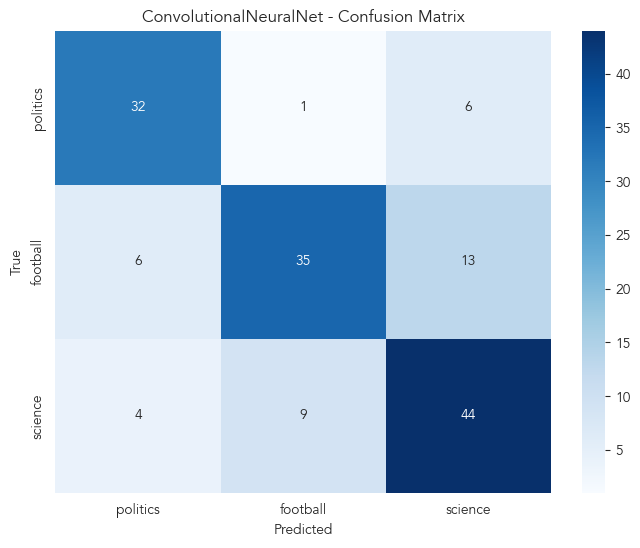

In [54]:
y_pred = translate_predictions(cnn_predictions, class_dictionary)
cm_cnn = confusion_matrix(y_test, y_pred)
plot_cm(cm_cnn, convnet._name, class_dictionary)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.67      0.79      0.73        39
    politics       0.62      0.54      0.57        54
     science       0.61      0.61      0.61        57

    accuracy                           0.63       150
   macro avg       0.63      0.65      0.64       150
weighted avg       0.63      0.63      0.63       150



In [56]:
print("Final CNN Accuracy on the Test Set: {:.2f}".format(convnet.evaluate(x_test, y_encoded_test)[1]))

5/5 [==============================] - 2s 375ms/step - loss: 0.8215 - accuracy: 0.6333 - auc: 0.8247
Final CNN Accuracy on the Test Set: 0.63


## LSTM

In [59]:
lstm = Sequential()

lstm.add(Embedding(input_dim=sequence_length, output_dim=64, input_length=sequence_length))
lstm.add(Bidirectional(LSTM(64)))
lstm.add(Dense(3, activation="softmax"))

lstm._name = "LSTM_net"

In [60]:
lstm.summary(show_trainable=True)

Model: "LSTM_net"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding_2 (Embedding)     (None, 300, 64)           19200     Y          
                                                                            
 bidirectional_1 (Bidirecti  (None, 128)               66048     Y          
 onal)                                                                      
                                                                            
 dense_6 (Dense)             (None, 3)                 387       Y          
                                                                            
Total params: 85635 (334.51 KB)
Trainable params: 85635 (334.51 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________________________


In [61]:
lstm.compile(optimizer="adam", loss="categorical_crossentropy",
                 metrics=['accuracy',"AUC"])

In [63]:
start = time.time()
history_lstm = lstm.fit(x=x_train, y=y_encoded_train, 
              validation_data=(x_val, y_encoded_val), 
              epochs=25,
              callbacks=[early_stop])


elapsed = time.time() - start
record_times[lstm._name] = elapsed

Epoch 1/25


2023-12-10 00:43:25.175852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:25.709032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:25.772010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:28.568923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:28.587478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 1.1020 - accuracy: 0.3250 - auc: 0.4824

2023-12-10 00:43:38.479296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:38.773680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 00:43:38.805184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 18s 285ms/step - loss: 1.1020 - accuracy: 0.3250 - auc: 0.4824 - val_loss: 1.1002 - val_accuracy: 0.3087 - val_auc: 0.5033
Epoch 2/25
38/38 [==============================] - 5s 128ms/step - loss: 1.0982 - accuracy: 0.3476 - auc: 0.5119 - val_loss: 1.1018 - val_accuracy: 0.3087 - val_auc: 0.4827
Epoch 3/25
38/38 [==============================] - 5s 127ms/step - loss: 1.0982 - accuracy: 0.3476 - auc: 0.5119 - val_loss: 1.0992 - val_accuracy: 0.3154 - val_auc: 0.5062
Epoch 4/25
38/38 [==============================] - 5s 129ms/step - loss: 1.0954 - accuracy: 0.3752 - auc: 0.5370 - val_loss: 1.0840 - val_accuracy: 0.4161 - val_auc: 0.6194
Epoch 5/25
38/38 [==============================] - 6s 153ms/step - loss: 1.0822 - accuracy: 0.3953 - auc: 0.5843 - val_loss: 1.0189 - val_accuracy: 0.5168 - val_auc: 0.6859
Epoch 6/25
38/38 [==============================] - 6s 147ms/step - loss: 1.0528 - accuracy: 0.4380 - auc: 0.6196 - val_loss: 0.9881 - val_a

### Performance Evaluation - LSTM

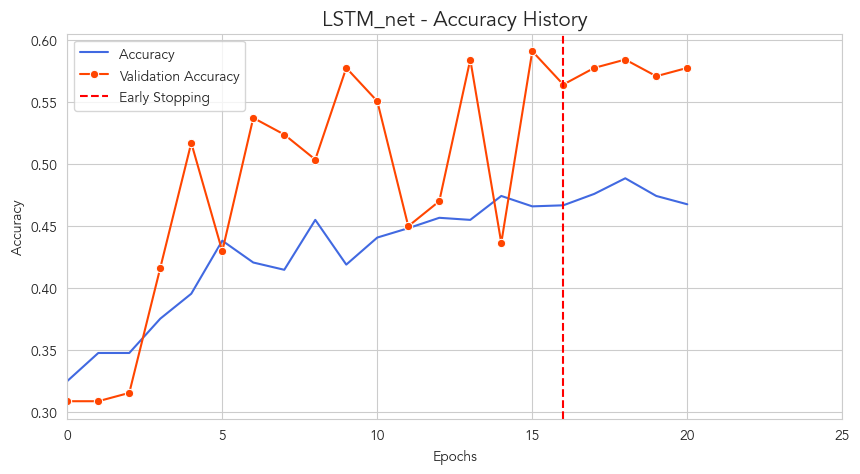

In [98]:
plot_perf_over_epochs(history_lstm, lstm._name,  epochs=25, metric="accuracy")

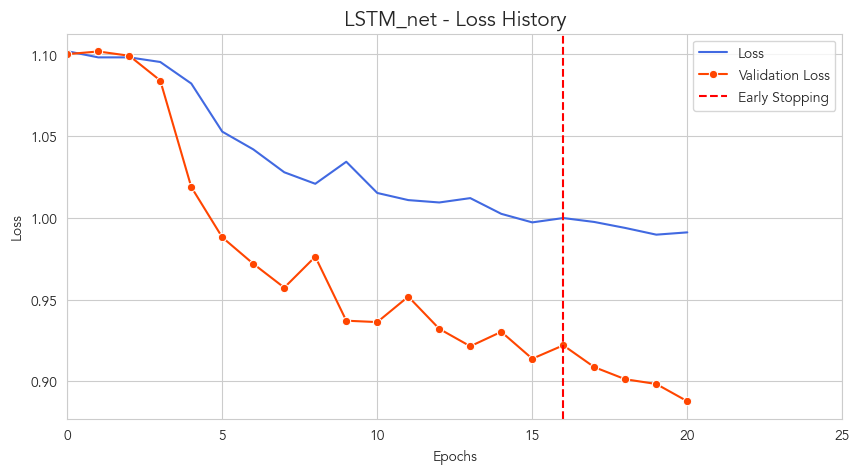

In [99]:
plot_perf_over_epochs(history_lstm, lstm._name,  epochs=25, metric="loss")

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_8281/2768384562.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_auc_values, 'ro-', label='Validation AUC', color='dodgerblue')


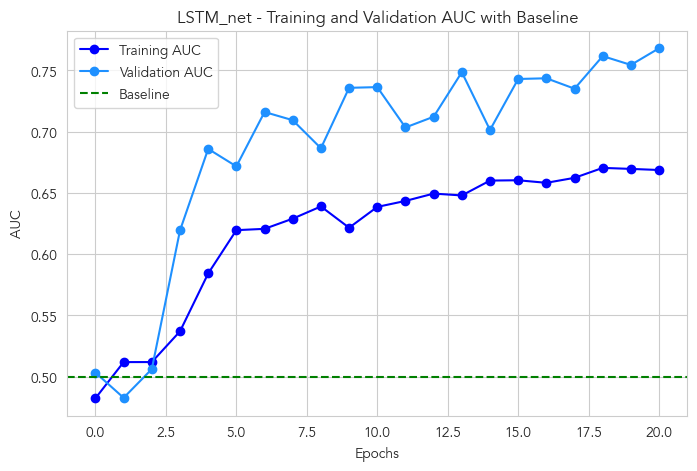

In [100]:
plot_perf_over_epochs(history_lstm, lstm._name,  epochs=25, metric="auc")

### Confusion Matrix and Classification Report for LSTM

In [107]:
lstm_predictions = lstm.predict(x_test)
lstm_predictions

2023-12-10 03:14:22.045112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 03:14:22.241293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-10 03:14:22.296021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 146ms/step


array([[0.3314237 , 0.27475452, 0.39382175],
       [0.39075938, 0.23301727, 0.37622342],
       [0.32194906, 0.1881742 , 0.48987672],
       [0.25881854, 0.32104784, 0.42013353],
       [0.21584588, 0.6235983 , 0.16055581],
       [0.3100857 , 0.33365932, 0.356255  ],
       [0.30698192, 0.3328507 , 0.3601674 ],
       [0.31286198, 0.32915083, 0.35798714],
       [0.50969845, 0.11383399, 0.37646756],
       [0.27098492, 0.23859157, 0.49042353],
       [0.3034502 , 0.31900716, 0.3775426 ],
       [0.25310183, 0.4058559 , 0.34104222],
       [0.33368874, 0.29901928, 0.36729202],
       [0.293098  , 0.334031  , 0.37287098],
       [0.19960605, 0.6473656 , 0.1530283 ],
       [0.31010327, 0.34023887, 0.34965792],
       [0.30836424, 0.32729214, 0.36434364],
       [0.30104342, 0.32132718, 0.3776294 ],
       [0.24804346, 0.39140227, 0.36055428],
       [0.9407498 , 0.01954397, 0.03970622],
       [0.31124842, 0.30566508, 0.38308647],
       [0.33803964, 0.2944526 , 0.3675078 ],
       [0.

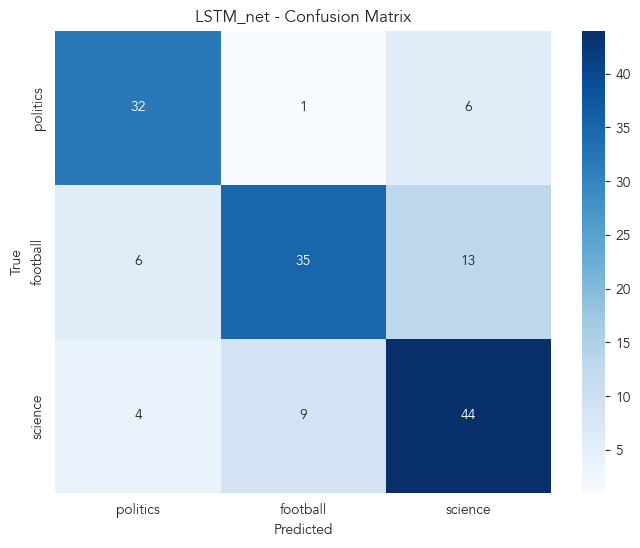

In [108]:
y_pred = translate_predictions(lstm_predictions, class_dictionary)
cm_lstm = confusion_matrix(y_test, y_pred)
plot_cm(cm_lstm, lstm._name, class_dictionary)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    football       0.55      0.54      0.55        39
    politics       0.82      0.33      0.47        54
     science       0.51      0.81      0.63        57

    accuracy                           0.57       150
   macro avg       0.63      0.56      0.55       150
weighted avg       0.63      0.57      0.55       150

